In [5]:
!wget -nc 'https://github.com/LujaMX/SSPIA/raw/b03fb791de7bb15b9e7fd5404158eec3ee63e77f/Image_1.bmp'
!wget -nc 'https://github.com/LujaMX/SSPIA/raw/main/Template.bmp'

import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython import display

File ‘Image_1.bmp’ already there; not retrieving.

File ‘Template.bmp’ already there; not retrieving.



NCC

In [6]:
def NCC(img, temp, x, y):
    H = temp.shape[0]
    W = temp.shape[1]

    sum_img = 0.0
    sum_temp = 0.0
    sum_2 = 0.0

    for i in range(W):
        for j in range(H):
            sum_img = sum_img + float(img[int(y)+j, int(x)+i]) ** 2
            sum_temp = sum_temp + float(temp[j, i]) ** 2
            sum_2 = sum_2 + float(img[int(y)+j, int(x)+i]) * float(temp[j, i])

    val = sum_2 / (np.sqrt(float(sum_img)) * np.sqrt(float(sum_temp)))

    return val

Algoritmo

El código de ayuda contempla DE, pero puedes utilizar cualquiera visto en clase.

In [7]:
def DE(img, temp, animacion):
    # Parámetros del algoritmo DE
    n_Gen = 80
    n_Pop = 50
    dim = 2
    F = 0.9  # Factor de escala para la mutación
    Cr = 0.9  # Tasa de recombinación

    # Convertir imágenes a escala de grises
    img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    temp_g = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)

    img_H = img_g.shape[0]
    img_W = img_g.shape[1]
    temp_H = temp_g.shape[0]
    temp_W = temp_g.shape[1]

    # Definir límites para las variables de decisión (coordenadas x, y)
    lb = np.array([1, 1])
    ub = np.array([img_W-temp_W, img_H-temp_H])

    # Inicializar población y fitness
    x = np.zeros((dim, n_Pop))
    fitness = -1 * np.ones(n_Pop)

    # Inicialización aleatoria de la población
    for i in range(n_Pop):
        x[0, i] = np.random.randint(lb[0], ub[0])
        x[1, i] = np.random.randint(lb[1], ub[1])

        fitness[i] = NCC(img_g, temp_g, int(x[0, i]), int(x[1, i]))

    best_plot = np.zeros(n_Gen)

    # Bucle principal de DE
    for n in range(n_Gen):
        if animacion:
            img_2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.clf()
            display.display(plt.gcf())
            display.clear_output(wait=True)
            plt.imshow(img_2)

            for i in range(n_Pop):
                # Dibujar rectángulos en la animación
                plt.plot([x[0, i], x[0, i] + temp_W], [x[1, i], x[1, i]], color=(0,1,0), linewidth=3)
                plt.plot([x[0, i], x[0, i]], [x[1, i], x[1, i] + temp_H], color=(0,1,0), linewidth=3)
                plt.plot([x[0, i] + temp_W, x[0, i] + temp_W], [x[1, i], x[1, i] + temp_H], color=(0,1,0), linewidth=3)
                plt.plot([x[0, i], x[0, i] + temp_W], [x[1, i] + temp_H, x[1, i] + temp_H], color=(0,1,0), linewidth=3)
            plt.show(block=False)
            plt.pause(.05)

        for i in range(n_Pop):
            # Mutación
            r1, r2, r3 = np.random.choice(n_Pop, 3, replace=False)
            mutant = x[:, r1] + F * (x[:, r2] - x[:, r3])

            # Garantizar que los valores estén dentro de los límites
            mutant = np.maximum(lb, np.minimum(ub, mutant))

            # Recombinación
            crossover = np.random.rand(dim) < Cr
            if not np.any(crossover):
                crossover[np.random.randint(dim)] = True

            # Selección
            trial = np.where(crossover, mutant, x[:, i])
            trial_fitness = NCC(img_g, temp_g, int(trial[0]), int(trial[1]))

            # Actualizar la población si el nuevo individuo es mejor
            if trial_fitness > fitness[i]:
                x[:, i] = trial
                fitness[i] = trial_fitness

        best_plot[n] = np.max(fitness)

    ind = np.argmax(fitness)
    p = x[:, ind]

    # Graficar la evolución del fitness
    plt.plot(best_plot)
    plt.xlabel("Generación")
    plt.ylabel("Fitness")
    plt.show()

    return p

Algoritmo

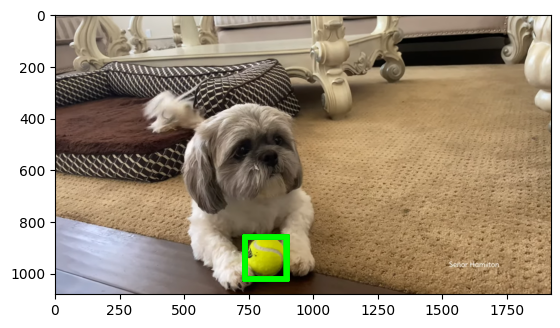

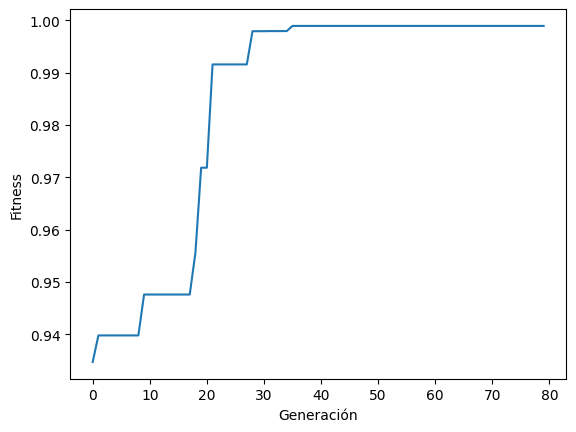

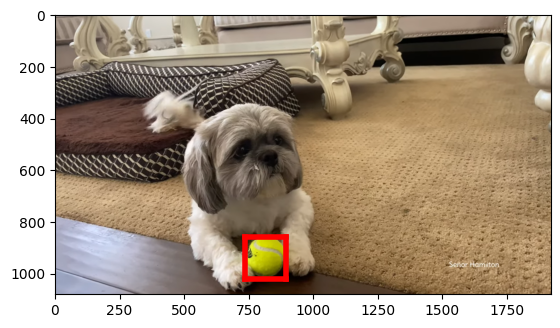

In [9]:
animacion = 1

img = cv2.imread('Image_1.bmp')
temp = cv2.imread('Template.bmp')

p = DE(img, temp, animacion)

img_H = img.shape[0]
img_W = img.shape[1]
temp_H = temp.shape[0]
temp_W = temp.shape[1]

xp = p[0]
yp = p[1]

img_2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_2)
plt.plot([xp, xp+temp_W], [yp, yp], 'r', linewidth=4)
plt.plot([xp, xp], [yp, yp+temp_H],'r', linewidth=4)
plt.plot([xp+temp_W, xp+temp_W], [yp, yp+temp_H],'r', linewidth=4)
plt.plot([xp, xp+temp_W], [yp+temp_H, yp+temp_H],'r', linewidth=4)
plt.show()